<a href="https://colab.research.google.com/github/mths-miranda/data_science/blob/master/Paris_France_Analise_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

**Data Science na Prática 3.0**

*by [sigmoidal.ai](https://sigmoidal.ai)*

---
#Analise exploratória de dados do Airbnb - Paris, França




<center><img alt="Louvre Museum" width="25%" src="https://news.airbnb.com/wp-content/uploads/sites/4/2020/04/Airbnb_Lockup_Over_Gradient.png"></center>

O [Airbnb](https://www.airbnb.com.br/) nasceu em 2007. Hoje, a plataforma conta com 4 milhões de anfitriões em quase todos os países do mundo. É considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

A plataforma é como uma rede social, onde você cria um perfil para ter acesso às opções de hospedagem disponibilizadas pelos anfitriões.


E os números da empresa impressionam. Até 2021 foram registrados 1 bilhão de chegadas de hópedes e mais de US$110 bilhões de ganhos para os anfritiões, isso tudo atuando nos mais de 220 países.

Fonte: https://news.airbnb.com/br/about-us/

---

##Paris, França

Nesse projeto irei analisar os dados registrados na cidade de Paris, na França, que foram disponibilizados pela plataforma [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e ver quais insights podem ser extraídos a partir dos dados brutos.



<img alt="Louvre Museum" width="75%" src="https://raw.githubusercontent.com/mths-miranda/data_science/master/img/paris_france_j-venerosy-unsplash.jpg">

Foto: Louvre Museum. Click by [J. Venerosy](https://unsplash.com/@jvenerosy)


Paris, a capital da França, é uma importante cidade europeia e um centro mundial de arte, moda, gastronomia e cultura. Sua paisagem urbana do século XIX é cortada por avenidas largas e pelo rio Sena. A cidade é conhecida por monumentos como a Torre Eiffel e a Catedral de Notre-Dame, uma construção gótica do século XII, que sofreu um grave incêndio em Abril de 2019.

Lá está instalado o Museu do Louvre, o maior museu de arte do mundo. Um marco central de Paris, que está localizado na margem direita do rio Sena, no 1º distrito da cidade.


##Obtenção dos dados

O portal Inside Airbnb disponibiliza os dados frequentemente atualizados para a discusão pública. É possível importar os dados brutos, para o notebook, diretamente através do site, mas para esse projeto escolhi coletar os dados e armazená-los em um repositório do GitHub, evitando que uma futura atualização fuja do escopo da análise que estou fazendo.

*Atualização dos dados: 08 de Janeiro de 2022*

In [45]:
#importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster

In [46]:
#importando os dados para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/mths-miranda/data_science/master/datasets/paris_france_listings_2022-01-08_.csv",
                 sep=",")

##Analisando os dados

Antes de iniciar qualquer tratamento, é importante conhecer o *dataset*. Vou fazer isso observando as variáveis disponibilizadas e notando as 5 primeiras entradas.

**Dicionário de variáveis**
 * `id`: (integer) identificador exclusivo do anúncio
 * `name`: (text) descrição imóvel
 * `host_id`: (integer) identificador exclusivo do anfitrião/ usuário
 * `host_name`: (text) nome do anfitrião
 * `neighbourhood_group`: (text) grupo geocodificado ao qual o bairro faz parte
 * `neighbourhood`: (text) bairro onde está localizado o item
 * `latitude`: (numeric) coordenada da localização (World Geodetic System - WGS84)
 * `longitude`:  (numeric) coordenada da localização (World Geodetic System - WGS84)
 * `room_type`: (text) descrição do tipo de imóvel
 * `price`: (currency) preço diário em moeda local
 * `minimum_nights`: (integer) número mínimo de pernoites para o anúncio
 * `number_of_reviews`: (integer) quantidade de avaliações que o anúncio possui desde sua publicação
 * `last_review`: (date) data da última/mais recente revisão
 * `reviews_per_month`: (numeric) número de avaliações durante o período que está ativo (lifetime)
 * `calculated_host_listings_count`: (integer) número de anúncios que o anfitrião tem, no *dataset* atual, nesta cidade
 * `availability_365`: (integer) disponibilidade em dias no futuro
 * `number_of_reviews_ltm`: (integer) número de avaliações nos últimos 12 meses
 * `license`: (text) número da licença ou registro

In [47]:
#verificar 5 primeiras entradas do DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,100,2,263,2020-08-08,2.68,1,55,35,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,10,282,2021-09-29,2.28,1,233,13,7510400829623
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.07,1,293,0,7510903576564
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.85899,2.34735,Entire home/apt,75,180,0,NaN,NaN,1,58,0,"Available with a mobility lease only (""bail mo..."
4,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86227,2.37134,Entire home/apt,80,4,32,2021-06-23,0.51,1,212,7,7511101582862


No dicionário está indicando que as entradas na variável `id` são valores únicos, exclusivo de cada listagem ou anúncio. 

Irei testar se o anúncio aparece mais de uma vez no *DataFrame* para decidir se essa varíavel servirá como o *index*.

In [48]:
#identificando valores únicos para a variável id
df.id.value_counts()

5396        1
35864182    1
35892166    1
35892170    1
35892174    1
           ..
16311234    1
16318054    1
16318413    1
16320883    1
52696717    1
Name: id, Length: 49634, dtype: int64

In [49]:
#identificando número de entradas
df.shape[0]

49634

Veja que a variável `id` possui 49.634 valores únicos (*Lenght: 49634*), que é o mesmo número de entradas registrados nos dados (*shape[0] = 49634*). Portanto, é possível interpretar que as entradas na variável `id` não se repetem no *DataFrame*. Essa varíavel será utilizada como o *index*.

In [50]:
 #definindo coluna id como index
df = df.set_index('id')

In [51]:
#verificando DataFrame como novo index definido
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,100,2,263,2020-08-08,2.68,1,55,35,7510402838018
7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,10,282,2021-09-29,2.28,1,233,13,7510400829623
7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.07,1,293,0,7510903576564
9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.85899,2.34735,Entire home/apt,75,180,0,NaN,NaN,1,58,0,"Available with a mobility lease only (""bail mo..."
9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86227,2.37134,Entire home/apt,80,4,32,2021-06-23,0.51,1,212,7,7511101582862


### **Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

Essa é uma exploração inicial a partir de onde será possível compreender os dados que foram fornecidos.

In [52]:
#verificando o número de variáveis e entradas
print("\nVariavéis do DataFrame: {}".format(df.shape[1]),
      "\nNúmero de Entradas: {}".format(df.shape[0]))


Variavéis do DataFrame: 17 
Número de Entradas: 49634


In [53]:
#identificando os tipo de cada variavél
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

####Tratando os tipos das variáveis

É possível perceber que algumas variáveis não tiveram o `type` reconhecidos corretamente, visto que estão diferentes do que era esperado no **dicionário**.

A variavél `last_review` no dicionário é descrita como sendo do tipo *date* porém foi reconhecida como *object*. É necessário acertar o seu tipo.

Antes de iniciar os ajustes no *DataFrame* irei criar chek point, para o caso de ser necessário verificar o dataset original.

In [54]:
#criando uma cópia do dataset
df_clean = df.copy()

In [55]:
#ajustando type da variável last_review
df_clean[['last_review']] = df_clean[['last_review']].astype('datetime64')

Já a variável `price`, pelo nosso dicionário deveria ser uma entrada do tipo *currency*, ou seja, se refere a um valor na moeda local. Sabendo também, que valores de moeda são decimais, irei alterar seu tipo para `float`.

Por se tratar de dados de Paris, entende-se que os valores descritos estão em *Euros (€)*.

In [56]:
#ajustando type da variável price
df_clean[['price']] = df_clean[['price']].astype('float')

In [57]:
#verificando se as mudanças foram efetivas
df_clean.dtypes

name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

Os valores ausentes no *DataFrame* podem induzir a interpretações incorretas dos dados. Portanto é importante identificar a sua representatividade dentro do conjunto e tomar ações para o uso correto do restante dos dados que estão presentes no *DataFrame*.

Abaixo, é possível ver o percentual de valores ausentes para cada variável e ter a consciência da sua dimensão.

In [58]:
#identificando valores ausentes
((df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending = False)) * 100

neighbourhood_group               100.000000
license                            43.722045
last_review                        22.180360
reviews_per_month                  22.180360
name                                0.094693
host_name                           0.056413
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
host_id                             0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
neighbourhood                       0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
dtype: float64

####Tratando os valores ausentes

Podemos assumir por excluir ou substituir os valores ausentes por algum mais representativo, como a média ou a mediana. Optar pela exclusão é sempre um trade-off, pois podemos descartar outras informações das entradas. Então é relevante ter cautela, seja qual for a decisão, porque irá  infuenciar as informações e decisões extraídas da análise.

Na classificação acima a variável `neighbourhood_group`, que deveria estar preenchida com texto, está 100% vazia. Logo, ela pode ser descartada, pois não irá contribuir com a análise nesse momento. Em outras aplicações, é interessante entender o motivo desse "não preenchimento", uma vez que isto pode ser uma característica dos seus dados.

Ao tomar essa ação, é necessário ter atenção no procedimento escolhido para excluir apenas a variável e não as entradas com valores vazios nessa variável, já que a segunda opção iria excluir todas as entradas do *DataFrame*.

In [59]:
#excluir a variável neighbourhood_group
df_clean.drop(columns=['neighbourhood_group'], inplace = True)

In [60]:
#comparar o antes e o depois
print("Antes: \t{}".format(df.shape),
      "\nDepois: {}".format(df_clean.shape))

Antes: 	(49634, 17) 
Depois: (49634, 16)


O *DataFrame* não teve o número de entradas/ linhas (49.634) alterado e está com uma variável a menos (16 variáveis).

Ao longo da análise irei identificar se é necessário tratar os demais valores ausentes das outras variáveis (`license`, `last_review`, `reviews_per_month`, `name` e `host_name`).

### **Qual o tipo de distribuição das variáveis?** 

A visualização dos valores através de histogramas facilita a análse e interpretação.

Ao criar a visualização para todos as entradas númericas, algumas não irão fazer sentido e podem ser desconsideradas como `host_id`, `latitude`, `longitude`. Já para as demais, pode-se retirar bons insights para o tratamento dos dados.

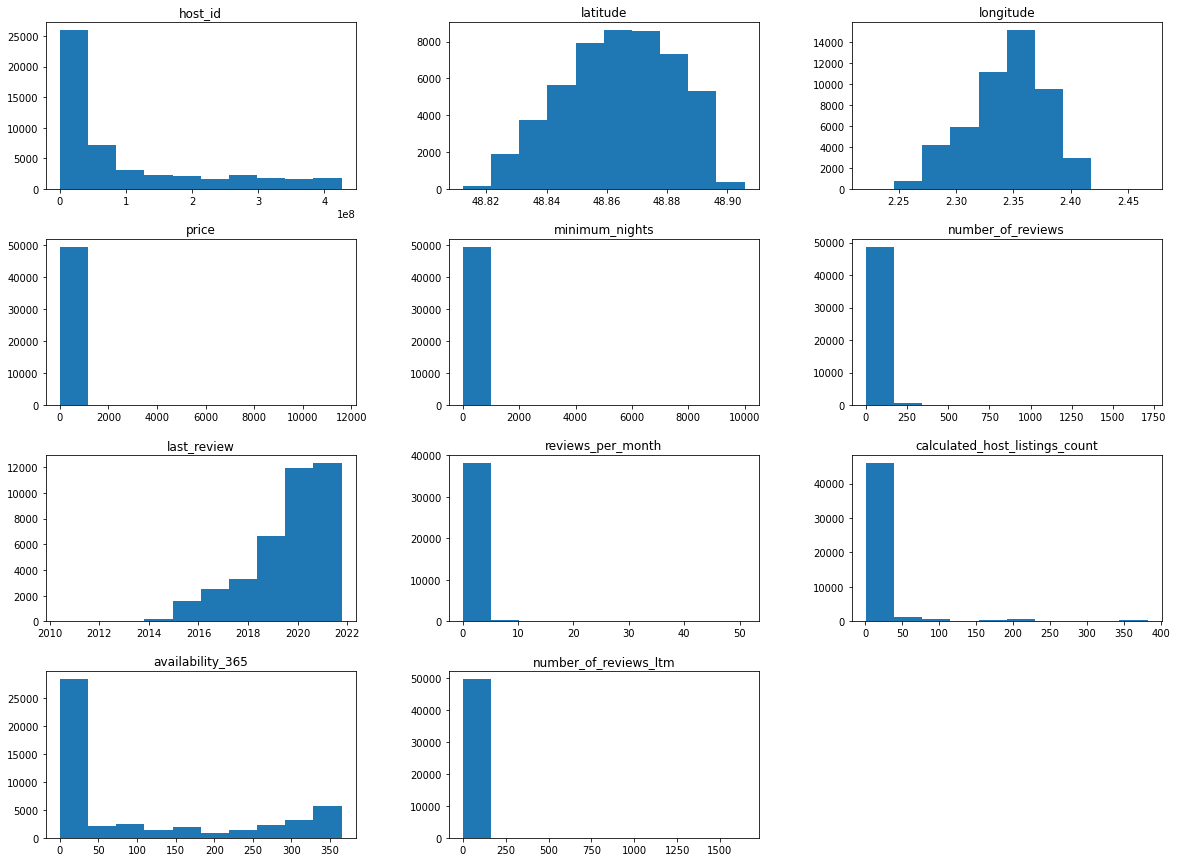

In [61]:
#verificando as distribuções
df_clean.hist(figsize=(20,15), grid=False);

No histograma da variável `price` pode-se ver que não há uma distribuição. Isso sugere que existam outliers nas entradas. O mesmo acontece para `minimum_nights`. 

Para essa análise exploratória, será útil checar também as informações estatísticas dessas variáveis.

In [62]:
#verificando informações estatísticas
df_clean.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.963400e+04,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,38625.000000,49634.000000,49634.000000,49634.000000
mean,9.711188e+07,48.863998,2.344889,130.203207,111.961256,21.131080,0.813996,13.192167,100.681569,2.789016
std,1.179651e+08,0.018146,0.033118,229.383172,169.898643,45.624607,1.243740,47.381927,134.541931,11.946425
min,2.626000e+03,48.812220,2.221440,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.321955e+07,48.850880,2.324130,60.000000,2.000000,1.000000,0.130000,1.000000,0.000000,0.000000
50%,3.876027e+07,48.865330,2.347985,90.000000,4.000000,5.000000,0.390000,1.000000,1.000000,0.000000
75%,1.437275e+08,48.878450,2.369280,140.000000,365.000000,21.000000,1.000000,2.000000,221.000000,2.000000
max,4.263328e+08,48.905690,2.467120,11600.000000,9999.000000,1711.000000,50.920000,382.000000,365.000000,1644.000000


Aqui pode-se entender melhor algumas características dos dados. 

Na variável `price` tem-se que a mediana (quartil 50%) das entradas é de 90.00 Euros, já o valor máximo registrado está em 11600.00 Euros por diária. Possivelmente temos um outlier nessa variável. É difícil imaginar que alguém pagaria tão caro por uma hospedagem.

> Outliers são valores que se distanciam muito dos demais, podendo ser para cima (superiores) ou para baixo (inferiores).

Outro detalhe que chama a atenção é o valor mínimo cobrado por uma diária, que é de 0 (zero) Euros. Nessa análise, vou deduzir que essas entradas provavelmente possuem algum erro, pois certamente não haverá aluguel gratuito na plataforma.

Para a variável `minimum_ninghts` também nota-se que o maior valor (9999) não condiz com a realidade de quem faz locação por pernoites, já que isso equivale a mais de 27 anos de diárias.

Um quarto ponto que chama a atenção é o Q3 (quartil 75%) muito alto, 365 dias. Uma dedução é que um ou mais anfitriões tenham disponibilizado seus imovéis pelo período mínimo de 1 ano, o que não foge tanto assim da realidade do negócio.

Nossa primeira tratativa será identificar a proporção de entradas com preço igual a zero.

In [63]:
#identificando número de entradas com price igual a zero
df_clean.price.value_counts()[0]

59

59 entradas é uma proporção muito pequena comparada ao número total (49634). Podemos decidir excluir essas entradas.

Antes disso, continuaremos a análise dos outliers.

####Tratando outliers

Vou tratar os outliers de algumas variáveis que podem ser importantes nessa análise e para isso é preciso para cada uma delas:

* Definir o Q1 (quartil 25%) e Q3 (quartil 75%)
* Calcular o IQR (intervalo entre quartis) = Q3 - Q1
* Definir o limite superior (Q3 + 1.5 * IQR) e inferior (Q1 - 1.5 * IQR) para cortar os outliers

In [64]:
#identificar os outliers para a variável price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
iqr_price = q3_price - q1_price
print('IQR da variável price é: ', iqr_price)

#definindo os limites
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price
print('O limite superior é: ', sup_price)
print('O limite inferior é: ', inf_price)

IQR da variável price é:  80.0
O limite superior é:  260.0
O limite inferior é:  -60.0


O limite inferior calculado seria de -60.00 Euros. Porém, esse valor não é coerente com a realidade dos nossos dados, visto que nenhum anfitrião irá "pagar" para alugar seu espaço.

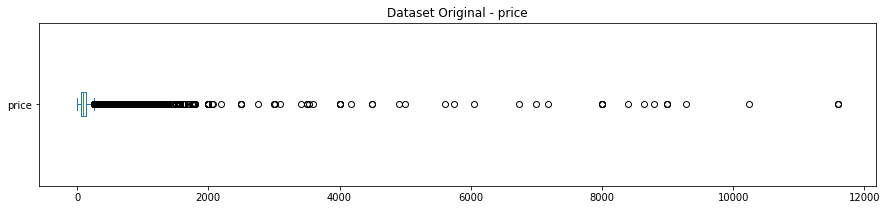


O Dataset original possui 49634 entradas.
4005 entradas acima de 260.00.
Representam 8.07% do dataset


In [65]:
#verificando o conjunto antes da exclusão dos outliers
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()

print('\nO Dataset original possui {} entradas.'.format(df_clean.shape[0]))
print('{} entradas acima de {:.2f}.'.format(len(df_clean[df_clean.price > sup_price]), sup_price))
print('Representam {:.2f}% do dataset'.format(((len(df_clean[df_clean.price > sup_price]) / df_clean.shape[0]) * 100)))

Veja nessa *gráfico boxblot* que os outliers são apenas superiores, existem 4005 entradas nessa condição, o que corresponde a 8.07% das entradas. Eliminar 
essas entradas com `price` acima do limite superior não trará grandes prejuízos para a análise. 

Então para essa variável trataremos apenas os outliers superiores e os com entrada igual a zero.

Verificando outras variáveis:

In [66]:
#identificar os outliers para a variavél minimum_nights
q1_minimum_nights = df_clean.minimum_nights.quantile(.25)
q3_minimum_nights = df_clean.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável price é: ', iqr_minimum_nights)

#definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights
print('O limite superior é: ', sup_minimum_nights)
print('O limite inferior é: ', inf_minimum_nights)

IQR da variável price é:  363.0
O limite superior é:  909.5
O limite inferior é:  -542.5


Também para essa variável não é preciso tratar o limite inferior, pois vimos na descrição das informações estatísticas que o menor valor de entrada é de 1 noite.


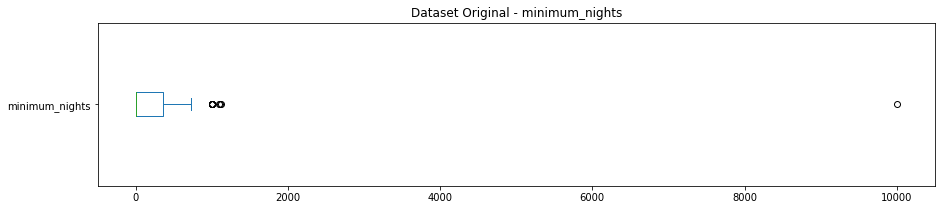


O Dataset original possui 49634 entradas.
11 entradas acima de 909.50.
Representam 0.02% do dataset


In [67]:
#verificando o conjunto antes da exclusão dos outliers
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()

print('\nO Dataset original possui {} entradas.'.format(df_clean.shape[0]))
print('{} entradas acima de {:.2f}.'.format(len(df_clean[df_clean.minimum_nights > sup_minimum_nights]), sup_minimum_nights))
print('Representam {:.2f}% do dataset'.format(((len(df_clean[df_clean.minimum_nights > sup_minimum_nights]) / df_clean.minimum_nights.shape[0])*100)))

A representatividade das entradas em `minimum_nights` acima do limite superior também é muito pequena, comparada com o tamanho do dataset. A ação será de eliminar essas entradas.

Porém, como citei anteriormente, o Q3 dessa variável é de 365 dias, o que faz com que nosso limite superior seja muito alto (909.5 dias, equivalente a quase 2.5 anos). Vou identificar quantas entradas existem acima de 365 dias para poder assumir esse número como um limite para essa análise. 

In [68]:
#identificando entradas acima de 365 dias em minimum_nights
len(df_clean[df_clean.minimum_nights > 365])

22

Temos apenas 22 entradas acima de 365 dias. A decisão aqui é por eliminar todas as entradas acima de 365 dias, pois a proporção com nosso dataset ainda é muito pequena.

In [69]:
#criando um check point
df_paris = df_clean.copy()

#eliminando as entradas com price acima do limite superior
df_paris.drop(df_paris[df_paris.price > sup_price].index, axis=0, inplace = True)

#eliminando as entradas com price igual a zero
df_paris.drop(df_paris[df_paris.price == 0.0].index, axis=0, inplace = True)

#eliminar as entradas com minimum_nights acima do limite superior
df_paris.drop(df_paris[df_paris.minimum_nights > 365].index, axis=0, inplace = True)

In [70]:
#comparando antes e depois
print("Antes: \t{}".format(df_clean.shape))
print("Depois: {}".format(df_paris.shape))
print("Foram eliminadas {} entradas.".format(df_clean.shape[0] - df_paris.shape[0]))

Antes: 	(49634, 16)
Depois: (45549, 16)
Foram eliminadas 4085 entradas.


É importante citar que o número de entradas eliminadas não foi de 4086 ((59 entradas `price` = 0) + (4005 entradas com `price`> 260.00) + (22 entradas com `minimum_nights` > 365)), como alguém poderia esperar. Isso ocorre porque uma mesma entrada pode possuir duas ou mais características que determinamos separadamente. 

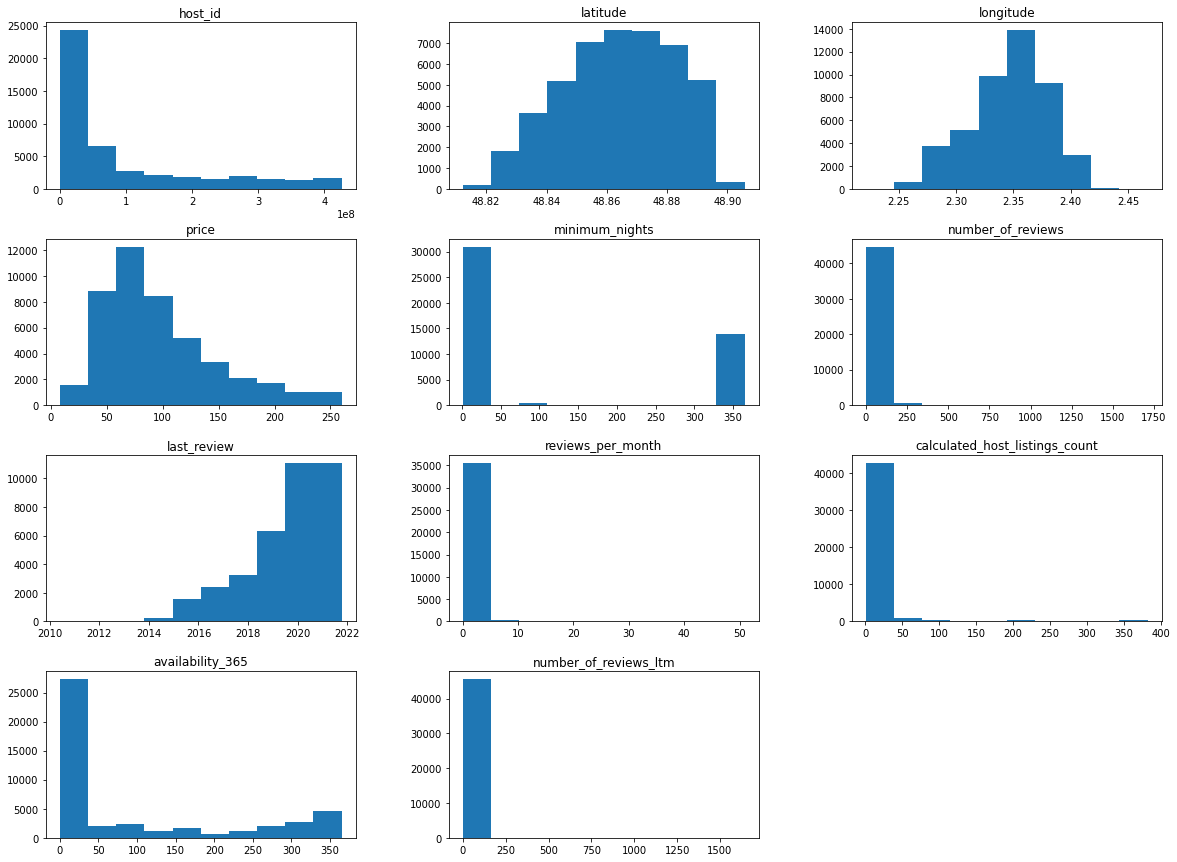

In [71]:
#verificando as distribuções após exclusão
df_paris.hist(figsize=(20,15), grid=False);

In [72]:
#verificando informações estatísticas após exclusão
df_paris.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.554900e+04,45549.000000,45549.000000,45549.000000,45549.000000,45549.000000,35960.000000,45549.000000,45549.000000,45549.000000
mean,9.404508e+07,48.864075,2.346072,96.785440,117.047948,21.446135,0.808513,11.038069,91.835123,2.801049
std,1.159901e+08,0.018519,0.033249,51.269505,165.701220,46.425359,1.254712,44.328319,130.152125,12.306990
min,2.626000e+03,48.812220,2.221440,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.299165e+07,48.850460,2.325290,60.000000,2.000000,1.000000,0.130000,1.000000,0.000000,0.000000
50%,3.765137e+07,48.865460,2.348960,84.000000,4.000000,5.000000,0.380000,1.000000,0.000000,0.000000
75%,1.354908e+08,48.879250,2.371150,120.000000,365.000000,21.000000,1.000000,1.000000,179.000000,2.000000
max,4.263279e+08,48.905690,2.467120,260.000000,365.000000,1711.000000,50.920000,382.000000,365.000000,1644.000000


Sabendo que estou lidando com dados de uma plataforma de locação de quartos, salas, casas, apartamentos... até aqui, foram eliminadas as entradas que poderiam sugerir falsas interpretações dos dados, por não condizer com as características do negócio.

Ainda permancecem alguns registros que chamam a atenção, mas podem fazer sentido. Como é o caso da variável `number_of_reviews`, com valor máximo de 1711. Isso significa que este item recebeu muito mais avaliações que a maioria dos demais. Podemos deduzir que ele foi anunciado a muito mais tempo ou foi locado por muito mais vezes.

### **Qual a correlação existente entre as variáveis**

Nessa exploração dos dados pode ser interessante compreender a correlação entre eles. Como por exemplo, buscar entender se a medida que o preço do aluguel aumenta como se comporta o número de avaliações que o imovél recebe. Ou ainda, a medida que o número mínimo de noites disponíveis diminui, se o preço da diária se altera para cima ou para baixo.



Aqui vou utilizar o coeficiente de correlação de Pearson, que é um teste que mede a relação estatística entre duas variáveis contínuas. Essa correlação está em uma escala que vai de -1 até +1, onde:

*   Correlação < 0: variáveis inversamente proporcionais
*   Correlação > 0: variáveis diretamente proporcionais
*   Correlação = 0: não há relação linear entre variáveis.


> Correlação não é causalidade.

É importante lembrar que a correlação entre duas variáveis não significa que uma seja causa e a outra efeito, mas sim, que elas caminham diretamente ou inversamente opostas em alguma proporção.

Vou criar uma matriz de correlação entre todos as variáveis, para ter nossas primeiras ideias sobre essa característica.

In [73]:
#criando uma matriz de correlação
df_paris.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
host_id,1.000000,-0.043650,-0.082389,0.142958,-0.177610,-0.109245,0.191251,0.203553,0.195410,0.086257
latitude,-0.043650,1.000000,0.087512,-0.056350,0.027539,-0.023221,-0.019343,-0.018991,-0.043951,-0.012909
longitude,-0.082389,0.087512,1.000000,-0.163014,-0.013235,-0.004137,-0.036990,-0.050476,-0.086685,-0.009101
price,0.142958,-0.056350,-0.163014,1.000000,-0.147856,0.051500,0.122061,0.148907,0.331256,0.077297
minimum_nights,-0.177610,0.027539,-0.013235,-0.147856,1.000000,-0.206805,-0.275886,-0.122722,-0.241223,-0.143521
number_of_reviews,-0.109245,-0.023221,-0.004137,0.051500,-0.206805,1.000000,0.601763,-0.018855,0.178829,0.481224
reviews_per_month,0.191251,-0.019343,-0.036990,0.122061,-0.275886,0.601763,1.000000,0.056446,0.255433,0.650969
calculated_host_listings_count,0.203553,-0.018991,-0.050476,0.148907,-0.122722,-0.018855,0.056446,1.000000,0.131720,0.032189
availability_365,0.195410,-0.043951,-0.086685,0.331256,-0.241223,0.178829,0.255433,0.131720,1.000000,0.144528
number_of_reviews_ltm,0.086257,-0.012909,-0.009101,0.077297,-0.143521,0.481224,0.650969,0.032189,0.144528,1.000000


Mesmo sem avaliar a matriz de correlação, é possível dizer que variáveis como `host_id`, `latidude`e `longitude` não teriam nenhuma correlação com as demais, porque elas são apenas informativos, que identificam cada imóvel ou item anunciado e seu anfitrião.

Portanto, para facilitar a interpretação dos dados, vou tomar algumas ações:

*   Plotar um *heatmap* com a correlação entre as variáveis
*   Eliminar pontualmente desse gráfico as variáveis que não desejo analisar
*   Plotar apenas a diagonal inferior (espelho da diagonal superior)






In [74]:
#criar novo DataFrame para análise da correlação com apenas as variáveis escolhidas
df_new = df_paris[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'number_of_reviews_ltm']].copy()

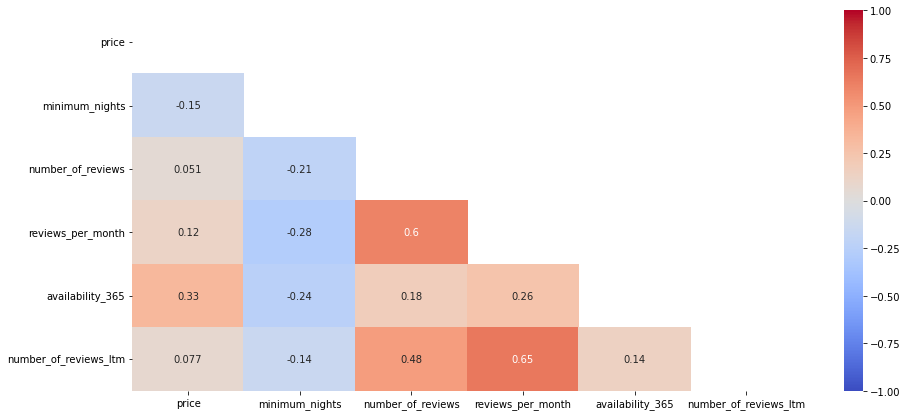

In [75]:
#criar máscara para exibir diagonal inferior
mask_inf = np.triu(df_new.corr())

#plotar um gráifco heatmap
fig, ax = plt.subplots(figsize=(15,7))  
sns.heatmap(df_new.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm', mask = mask_inf);

Observando o *heatmap* é possível ver que as 3 maiores correlações positivas são variáveis análogas.

1.   Correlação **0.6** entre `reviews_per_month` e `number_of_reviews`.
2.   Correlação **0.65** entre `number_of_reviews_ltm` e `reviews_per_month`
3.   Correlação **0.48** entre `number_of_reviews_ltm` e `number_of_reviews`



Apresenta também algumas outras pequenas correlações

*   Correlação **0.33** entre `availability_365` e `price`

Ou seja, a medida que a dispobilidade do item para locação no futuro aumenta, o preço também é maior. Uma dedução é que imovéis mais caros tendem a ser menos alugados, e por isso ficam mais disponíveis.

*   Correlação **-0.28** entre `reviews_per_month` e `minimum_nights`

Essa correlação, apesar de pequena, também pode fazer sentido, uma vez que se o item é disponibilizado para ser alugado por mais noites, ele será alugado menos vezes dentro do mês, e por isso, o número de usuários será menor para fazer a avaliação.

Vou dar um exemplo:

Um item com o `minimum_nights` de 5 noites, em um mês de 30 dias, pode ser alugado 6 vezes. Logo, poderá receber naquele mês 6 avaliações.

Já um item com o `minimum_nights` de 1 noite, em um mesmo mês de 30 dias, pode ser alugado 30 vezes, por 30 usuários diferentes. Então, poderá receber até 30 avaliações no mesmo período do acima.

Então, a medida que o `minimum_nights` aumenta o número de avaliações tende a diminuir.

### **Qual a média dos preços de aluguel em Paris?**
Quando iniciei a análise, os dados brutos possuiam 49634 entradas. Agora, após tratar outliers, valores ausentes e zerados, temos um total de 45549 entradas que correspondem a 91.77%.

Com os dados mais limpos, podemos calcular melhor alguns índices das variáveis, como por exemplo, o **custo médio do alguel em Paris**.

In [76]:
#calcular a média dos preços de aluguel
df_paris.price.mean()

96.78543985597928

O preço médio do aluguel na cidade de Paris é de 96.79 Euros. 

Para efeito didático, vou comparar essa informação com o mesmo cálculo sobre os dados brutos.

In [77]:
#calcular a médida dos preços de aluguel
print("Antes do tratamento dos dados, a média do aluguel era de {:.2f} Euros.".format(df.price.mean()))
print("Depois do tratamento dos dados, a média do aluguel é de {:.2f} Euros.".format(df_paris.price.mean()))

Antes do tratamento dos dados, a média do aluguel era de 130.20 Euros.
Depois do tratamento dos dados, a média do aluguel é de 96.79 Euros.


Aqui, é notável que o tratamento de dados podem influenciar diretamente qualquer análise e tomada de decisão.

Perceba que eliminar 8,23% dos dados, fez o aluguel reduzir 25.66%.

Imagine que algum imposto seja cobrado sobre o valor médio dos aluguéis, ou, que alguém esteja fazendo um orçamento para uma viajem. Qualquer decisão feita em cima dos dados brutos ou após eles serem tratados terá resultados diferentes.


### **Qual o tipo de imóvel mais alugado no Airbnb?**

Uma das variáveis que tenho a disposição para analisar esse ponto é `room_type`. Tomarei como um príncipio que quanto mais avaliações o item possui, mais vezes ele foi alugado. Para isso, vou analisar a variável `number_of_reviews`.

Primeiro vamos conhecer quantos tipos de imóveis diferentes são anunciados e quantos anuncios existem para cada um deles:

In [78]:
#identificar os tipos de imoveis anunciados
df_paris.room_type.value_counts()

Entire home/apt    37796
Private room        6691
Hotel room           736
Shared room          326
Name: room_type, dtype: int64

Agora que já é conhecido os tipos de imóveis presentes na variável  `room_type`, vou calcular quantas avaliações cada tipo recebeu.

In [79]:
#criar um DataFrame para visualizar somatório de avaliações por tipo de imóvel
df_paris.groupby(['room_type']).number_of_reviews.sum().sort_values(ascending=False)

room_type
Entire home/apt    770839
Private room       170388
Hotel room          28244
Shared room          7379
Name: number_of_reviews, dtype: int64

É pertinente notar que o imóvel *Entire home/apt* é o tipo mais anunciado e também é o tipo que mais recebeu avaliações.

Aqui provavelmente há uma causalidade entre essas duas características para todos os tipos, já que o número de avaliações aumenta ou diminui conforme o quantidade de itens anunciados para o tipo de imóvel.

### **Qual a localidade mais cara do dataset?**

Bom, imaginemos que alguém pretende viajar para Paris, está fazendo uma análise com esses mesmos dados, e está procurando meios de economizar nos seus planos. Essa pessoa vai querer saber qual bairro é mais caro ou mais barato ficar durante esse tempo. 

Vou criar um ranking da média do preço de aluguel por bairros para termos essa visão.

In [80]:
#verificar bairro mais caro
df_paris.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Louvre                 129.544725
Élysée                 128.733396
Hôtel-de-Ville         124.870555
Luxembourg             122.562055
Bourse                 120.065684
Temple                 119.616123
Palais-Bourbon         119.409170
Panthéon               112.721576
Passy                  111.932861
Opéra                  109.556678
Vaugirard               96.580868
Entrepôt                94.390186
Batignolles-Monceau     93.210421
Observatoire            88.258263
Popincourt              88.235747
Reuilly                 85.274669
Buttes-Montmartre       81.811350
Gobelins                80.415105
Buttes-Chaumont         73.085597
Ménilmontant            72.544979
Name: price, dtype: float64

Bom, agora sabemos que o bairro mais caro de Paris é o Louvre com uma média de aluguel de 129.54 Euros, e o mais barato é o Ménilmontant com a média de alguel de 72.54 Euros.

Mas, qual deles possui dos bairros possui uma oferta maior de acomodações?

In [89]:
#verificar itens anunciados por bairro
df_paris.neighbourhood.value_counts().sort_values(ascending=False)

Buttes-Montmartre      5163
Popincourt             4420
Vaugirard              3481
Entrepôt               3383
Batignolles-Monceau    2994
Buttes-Chaumont        2687
Ménilmontant           2679
Opéra                  2276
Passy                  2115
Temple                 2084
Reuilly                1966
Observatoire           1785
Gobelins               1708
Panthéon               1548
Bourse                 1492
Hôtel-de-Ville         1406
Luxembourg             1265
Palais-Bourbon         1156
Élysée                 1069
Louvre                  872
Name: neighbourhood, dtype: int64

Veja que o Louvre é o bairro com as acomodações mais caras e também é o que menos tem opções. Talvez ai se encaixe a regra da oferta e demanda, que é a relação inversa entre o preço e a disponibilidade.

Ainda analisando essa informação, o bairro com as acomodações mais baratas, Ménilmontant, está na posição 8 do ranking, com um pouco mais da metade do número de acomodações que encontradas no bairro em 1º lugar.

### **Qual é a média do mínimo de noites para aluguel?**

Quanto algum anfitrião anuncia seu imóvel para ser encontrado no Airbnb ele indica o mínimo de noites que o item está disponível para ser alugado.

Com os dados que temos é possível analisar quantas noites em média é exigido.

In [82]:
#minimo de noites para alguel
df_paris.minimum_nights.mean()

117.04794836330106

Bom, em média os imóveis são disponibilizados por 117 noites, ou quase 4 meses.

Mas, esse tempo não é muito extenso?

Não são muitas noites para quem usa um aplicativo de aluguel que para buscar hospedagem em viagens de lazer ou a trabalho?

Algumas seções atrás, após tratar os *outliers* e plotar histogramas para as variávies, vimos que a distribuição da variável `minimum_nights` chama a atenção pelo número de imóveis com 365 dias (1 ano) mínimo de aluguel.

Vou plotar o histograma aqui novamente para analisar esse comportamento.

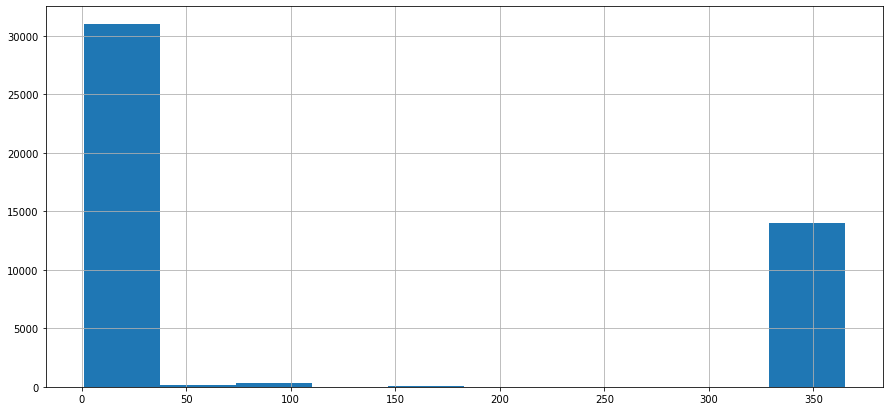

In [83]:
#plotando um histograma para minimum_nights
fig, ax = plt.subplots(figsize=(15,7))  

df_paris.minimum_nights.hist();

Veja que temos um número grande de imóveis que exigem o mínimo de noites próximo de 350 ou mais.

Para ajudar a compreender melhor, vou calcular as informações estatísticas dessa variável.

In [84]:
#calculando as informações estatísticas para minimum_nights
df_paris.minimum_nights.describe()

count    45549.000000
mean       117.047948
std        165.701220
min          1.000000
25%          2.000000
50%          4.000000
75%        365.000000
max        365.000000
Name: minimum_nights, dtype: float64

Com essas informações, confirmamos o que o histograma já havia nos indicado. Veja que temos um desvio padrão muito alto. Isso indica, que os valores dessa variável estão muito dispersos.

Outro ponto relevante é que o intervalo entre Q2 (mediana ou quartil 50%) e o Q3 (quartil 75%) é muito grande, isso sugere que exista um número grande de itens nesse intervalo.

In [85]:
#relembrando tamanho do nosso dataset
df_paris.shape

(45549, 16)

In [86]:
#calculando percentual de imóveis com mínimo de noites 365
print('Imóveis disponíveis por mínimo 365 noites: {}'.format(df_paris.minimum_nights.value_counts()[365]))
print('Que corresponde a {:.2f}% dos imóveis.'.format((df_paris.minimum_nights.value_counts()[365] / df_paris.shape[0]) *100))

Imóveis disponíveis por mínimo 365 noites: 13992
Que corresponde a 30.72% dos imóveis.


Aqui constatamos que, por algum motivo, existem um grande número de itens para alugel em Paris com período mínimo de 1 ano. Isso pode sugerir que a plataforma é muito utilizada por anfitriões para negociar o aluguel com residentes de Paris.

In [87]:
#calcular a média do mínimo de noites abaixo de 365
df_paris.minimum_nights[df_paris.minimum_nights < 365].mean()

7.108945717273505

Se desconsiderarmos essa parcela de 30.72%, dos imóveis com locação por 1 ano , da nossa observação, temos que em média os imóveis são disponibilizados por 7.11 noites.

## Conclusões

Ao longo desse estudo deixei claro a importância de conhecer bem os dados, pois eles influenciam diretamente as decisões que podem ser tomadas a partir deles.

Essa relação direta dos dados e resultdos é sensível, o que torna necessário investir tempo na exploração e validação de hipóteses.

Foi possível entender um pouco mais sobre os imóveis existentes no Airbnb em Paris, com aluguéis que variam entre 72 Euros, no bairro de Ménilmontant, até 130 Euros, no bairro do Louvre.

Vimos que a plataforma é muito utilizada para locação de longo período (1 ano), onde cerca de 30% dos imóveis são disponibilizados assim. Os outros 70% ficam disponíveis em média por 7 noites.

A preferência dos usuários é por locar imóveis completos (*Entire home/apt*), e não apenas os quartos, o que acompanha o fato de que esse tipo é o mais anunciado. Em contrapartida, os quartos compartilhados (*Shared room*) são os menos anunciados e também os menos alugados.

Esse projeto foi exploratório e não visou responder nenhuma questão específica, seja um problema real de uma empresa, de um estudo científico ou alguma outra abordagem. Seria possível examinar outras características caso fosse necessário, mais deixo isto para outro fórum.

>Ao conhecer esse estudo, te despertou interesse em conhecer Paris?
